# Analysis of the docked protein

## Installing and importing the necessary libraries

In [11]:
# installing the libraries 
install.packages("tidyverse")
install.packages("ggthemes")
install.packages("ggplot2")
install.packages("dplyr")

# importing the libraries
library(tidyverse)
library(ggthemes)
library(ggplot2)
library(dplyr)
library(glue)


The downloaded binary packages are in
	/var/folders/0x/y8lgwckd5jzdqrbj98g26nym0000gn/T//RtmpUTHNhB/downloaded_packages

The downloaded binary packages are in
	/var/folders/0x/y8lgwckd5jzdqrbj98g26nym0000gn/T//RtmpUTHNhB/downloaded_packages

The downloaded binary packages are in
	/var/folders/0x/y8lgwckd5jzdqrbj98g26nym0000gn/T//RtmpUTHNhB/downloaded_packages

The downloaded binary packages are in
	/var/folders/0x/y8lgwckd5jzdqrbj98g26nym0000gn/T//RtmpUTHNhB/downloaded_packages


## Reading the csv file that has the results of the simulation

In [12]:
dock <- read_csv("docked.csv")
head(dock)

Rows: 7335 Columns: 15
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (7): type, previous_aa, new_aa_1l, new_aa_3l, conversion, new_seq, secon...
dbl (8): residue_number, fa_score, ddg_score, hbond_score, sasa_score, diff_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


type,residue_number,previous_aa,new_aa_1l,new_aa_3l,conversion,new_seq,fa_score,ddg_score,hbond_score,sasa_score,secondary_structure,diff_hbonds,diff_sasa,diff_secondary_structure
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
wild_type,NA,NA,NA,NA,NA,MEAKTYIGKLKSRKIVSNEDTYDIQTSTHNFFANDILVHNSEIKPVQLPGAYNVNRKLDITSHNEDYTIVEQYERAEGRHSTGGMDELYKVSKGEEDNMAIIKEFMRFKVHMEGSVNGHEFEIEGEGEGRPYEGTQTAKLKVTKGGPLPFAWDILSPQFMYGSKAYVKHPADIPDYLKLSFPEGFKWERVMNFEDGGVVTVTQDSSLQDGEFIYKVKLRGTNFPSDGPVMQKKTMGSEASSERMYPEDGALKGEVKYRLKLKDGGHYDAEVKTTYKAKNPCCLVGSSEIITRNYGKTTIKEVVEIFDNDKNIQVLAFNTHTDNIEWAPIKAAQLTRPNAELVELEIDTLHGVKTIRCTPDHPVYTKNRGYVRADELTDDDELVVAI,4582.644,0.0000000,228,18665.82,LLLLEEEEEEEEEEEEEEEEEEEEEELLLEEEELLEEEELLLLLLLLLLLLEEEEEEEEEEEELLLLLEEEEEEEEEEEELLLLHHHHHLLLHHHHHHHHLLLLLEEEEEEEEEEELLEEEEEEEEEEEELLLLEEEEEEEEEELLLLLLLHHHLHHHHHHLLHHHLELLLLLLLLLHHHLLLLEEEEEEEEELLLLEEEEEEEEEEELLEEEEEEEEEEELLLLLLLLLLLLEEEELLEEEEEEEELLEEEEEEEEEEEELLLLEEEEEEEEEEEELLLLLEELLLEEEELLLEEEEHHHHHHHHLLLLLLEEEEEELLLLEEEEEEEEEEEEEEEEEEEEEEEEEELLEEEEEEELLLLEEEELLLEEEEHHHLLLLLEEEEEL,0,0.00000,0
mutant,1,M,A,ALA,1MtoA,AEAKTYIGKLKSRKIVSNEDTYDIQTSTHNFFANDILVHNSEIKPVQLPGAYNVNRKLDITSHNEDYTIVEQYERAEGRHSTGGMDELYKVSKGEEDNMAIIKEFMRFKVHMEGSVNGHEFEIEGEGEGRPYEGTQTAKLKVTKGGPLPFAWDILSPQFMYGSKAYVKHPADIPDYLKLSFPEGFKWERVMNFEDGGVVTVTQDSSLQDGEFIYKVKLRGTNFPSDGPVMQKKTMGSEASSERMYPEDGALKGEVKYRLKLKDGGHYDAEVKTTYKAKNPCCLVGSSEIITRNYGKTTIKEVVEIFDNDKNIQVLAFNTHTDNIEWAPIKAAQLTRPNAELVELEIDTLHGVKTIRCTPDHPVYTKNRGYVRADELTDDDELVVAI,4582.797,0.1532421,228,18569.42,LLLLEEEEEEEEEEEEEEEEEEEEEELLLEEEELLEEEELLLLLLLLLLLLEEEEEEEEEEEELLLLLEEEEEEEEEEEELLLLHHHHHLLLHHHHHHHHLLLLLEEEEEEEEEEELLEEEEEEEEEEEELLLLEEEEEEEEEELLLLLLLHHHLHHHHHHLLHHHLELLLLLLLLLHHHLLLLEEEEEEEEELLLLEEEEEEEEEEELLEEEEEEEEEEELLLLLLLLLLLLEEEELLEEEEEEEELLEEEEEEEEEEEELLLLEEEEEEEEEEEELLLLLEELLLEEEELLLEEEEHHHHHHHHLLLLLLEEEEEELLLLEEEEEEEEEEEEEEEEEEEEEEEEEELLEEEEEEELLLLEEEELLLEEEEHHHLLLLLEEEEEL,0,-96.40225,0
mutant,1,M,C,CYS,1MtoC,CEAKTYIGKLKSRKIVSNEDTYDIQTSTHNFFANDILVHNSEIKPVQLPGAYNVNRKLDITSHNEDYTIVEQYERAEGRHSTGGMDELYKVSKGEEDNMAIIKEFMRFKVHMEGSVNGHEFEIEGEGEGRPYEGTQTAKLKVTKGGPLPFAWDILSPQFMYGSKAYVKHPADIPDYLKLSFPEGFKWERVMNFEDGGVVTVTQDSSLQDGEFIYKVKLRGTNFPSDGPVMQKKTMGSEASSERMYPEDGALKGEVKYRLKLKDGGHYDAEVKTTYKAKNPCCLVGSSEIITRNYGKTTIKEVVEIFDNDKNIQVLAFNTHTDNIEWAPIKAAQLTRPNAELVELEIDTLHGVKTIRCTPDHPVYTKNRGYVRADELTDDDELVVAI,4592.105,9.4604330,228,18612.96,LLLLEEEEEEEEEEEEEEEEEEEEEELLLEEEELLEEEELLLLLLLLLLLLEEEEEEEEEEEELLLLLEEEEEEEEEEEELLLLHHHHHLLLHHHHHHHHLLLLLEEEEEEEEEEELLEEEEEEEEEEEELLLLEEEEEEEEEELLLLLLLHHHLHHHHHHLLHHHLELLLLLLLLLHHHLLLLEEEEEEEEELLLLEEEEEEEEEEELLEEEEEEEEEEELLLLLLLLLLLLEEEELLEEEEEEEELLEEEEEEEEEEEELLLLEEEEEEEEEEEELLLLLEELLLEEEELLLEEEEHHHHHHHHLLLLLLEEEEEELLLLEEEEEEEEEEEEEEEEEEEEEEEEEELLEEEEEEELLLLEEEELLLEEEEHHHLLLLLEEEEEL,0,-52.85661,0
mutant,1,M,D,ASP,1MtoD,DEAKTYIGKLKSRKIVSNEDTYDIQTSTHNFFANDILVHNSEIKPVQLPGAYNVNRKLDITSHNEDYTIVEQYERAEGRHSTGGMDELYKVSKGEEDNMAIIKEFMRFKVHMEGSVNGHEFEIEGEGEGRPYEGTQTAKLKVTKGGPLPFAWDILSPQFMYGSKAYVKHPADIPDYLKLSFPEGFKWERVMNFEDGGVVTVTQDSSLQDGEFIYKVKLRGTNFPSDGPVMQKKTMGSEASSERMYPEDGALKGEVKYRLKLKDGGHYDAEVKTTYKAKNPCCLVGSSEIITRNYGKTTIKEVVEIFDNDKNIQVLAFNTHTDNIEWAPIKAAQLTRPNAELVELEIDTLHGVKTIRCTPDHPVYTKNRGYVRADELTDDDELVVAI,4584.285,1.6412018,228,18612.52,LLLLEEEEEEEEEEEEEEEEEEEEEELLLEEEELLEEEELLLLLLLLLLLLEEEEEEEEEEEELLLLLEEEEEEEEEEEELLLLHHHHHLLLHHHHHHHHLLLLLEEEEEEEEEEELLEEEEEEEEEEEELLLLEEEEEEEEEELLLLLLLHHHLHHHHHHLLHHHLELLLLLLLLLHHHLLLLEEEEEEEEELLLLEEEEEEEEEEELLEEEEEEEEEEELLLLLLLLLLLLEEEELLEEEEEEEELLEEEEEEEEEEEELLLLEEEEEEEEEEEELLLLLEELLLEEEELLLEEEEHHHHHHHHLLLLLLEEEEEELLLLEEEEEEEEEEEEEEEEEEEEEEEEEELLEEEEEEELLLLEEEELLLEEEEHHHLLLLLEEEEEL,0,-53.29715,0
mutant,1,M,E,GLU,1MtoE,EEAKTYIGKLKSRKIVSNEDTYDIQTSTHNFFANDILVHNSEIKPVQLPGAYNVNRKLDITSHNEDYTIVEQYERAEGRHSTGGMDELYKVSKGEEDNMAIIKEFMRFKVHMEGSVNGHEFEIEGEGEGRPYEGTQTAKLKVTKGGPLPFAWDILSPQFMYGSKAYVKHPADIPDYLKLSFPEGFKWERVMNFEDGGVVTVTQDSSLQDGEFIYKVKLRGTNFPSDGPVMQKKTMGSEASSERMYPEDGALKGEVKYRLKLKDGGHYDAEVKTTYKAKNPCCLVGSSEIITRNYGKTTIKEVVEIFDNDKNIQVLAFNTHTDNIEWAPIKAAQLT

**Removing the amino acid sequence and the secondary sequence to make the data more readable**

In [13]:
dock_short <- dock |> select(-c(new_seq, secondary_structure, conversion, new_aa_3l))
head(dock_short)

type,residue_number,previous_aa,new_aa_1l,fa_score,ddg_score,hbond_score,sasa_score,diff_hbonds,diff_sasa,diff_secondary_structure
<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
wild_type,NA,NA,NA,4582.644,0.0000000,228,18665.82,0,0.00000,0
mutant,1,M,A,4582.797,0.1532421,228,18569.42,0,-96.40225,0
mutant,1,M,C,4592.105,9.4604330,228,18612.96,0,-52.85661,0
mutant,1,M,D,4584.285,1.6412018,228,18612.52,0,-53.29715,0
mutant,1,M,E,4587.564,4.9202476,228,18647.33,0,-18.48876,0
mutant,1,M,F,4595.891,13.2463685,228,18676.95,0,11.13349,0


## General Analysis 

### delta delta score
it seems that 
> **changing amino acids to P results in a higher delta delta g** 

In [14]:
ddg_descending <- dock_short |> arrange(desc(ddg_score)) |> head(n = 100)
table(ddg_descending$new_aa_1l)
ddg_descending |> head(n = 10)


 F  H  P  W  Y 
 1  1 80 16  2 

type,residue_number,previous_aa,new_aa_1l,fa_score,ddg_score,hbond_score,sasa_score,diff_hbonds,diff_sasa,diff_secondary_structure
<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mutant,141,K,P,9592.640,5009.995,227,18624.28,-1,-41.543762,0
mutant,11,K,P,9522.090,4939.446,227,18635.02,-1,-30.804448,0
mutant,57,K,P,9501.545,4918.901,227,18631.32,-1,-34.505152,2
mutant,242,E,P,9493.921,4911.276,227,18671.89,-1,6.069262,2
mutant,219,R,P,9486.094,4903.449,227,18584.22,-1,-81.601651,0
mutant,75,R,P,9485.029,4902.384,227,18616.27,-1,-49.547291,2
mutant,139,K,P,9478.241,4895.597,227,18655.32,-1,-10.496775,0
mutant,168,K,P,9448.708,4866.064,227,18632.12,-1,-33.697142,1
mutant,300,K,P,9442.567,4859.923,227,18645.39,-1,-20.427853,0


#### Plotting the delta delta G histogram
Below is a histogram of delta delta scores. The red vertical line is the value of wildtype

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


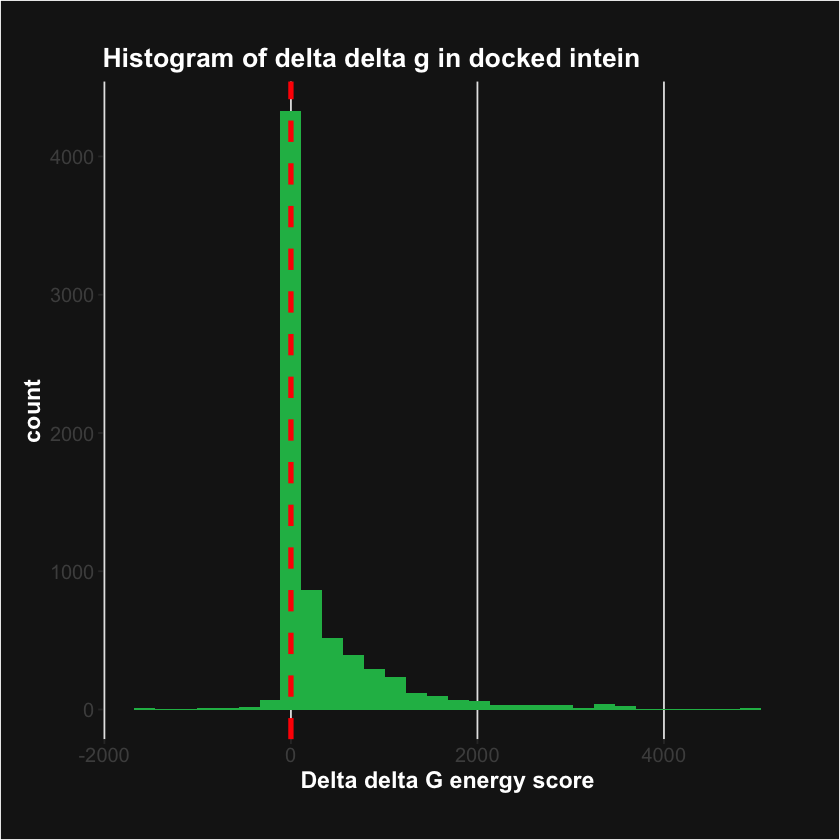

In [29]:
wildtype_ddg <- (dock_short |> filter(type == "wild_type"))$ddg_score
dock_short |> ggplot(aes(ddg_score)) + 
    geom_histogram(fill = "#1DB954") + 
    theme(plot.title = element_text(hjust = 0, size = 16, face = "bold", color = "white"),
        axis.title = element_text(size = 14, face = "bold", color = "white"),
        axis.text = element_text(size = 12),
        plot.background = element_rect(fill = "#191919"),
        panel.background = element_blank(),
        panel.grid.major.y = element_blank(),
        panel.grid.minor.y = element_blank(),
        panel.grid.major.x = element_line(color = "gray90", size = 0.5),
        panel.grid.minor.x = element_blank()) +
  ggtitle("Histogram of delta delta g in docked intein") +
  labs(x = "Delta delta G energy score", y = "count") +
  geom_vline(xintercept = wildtype_ddg, color = "red", size = 1.5, linetype = "dashed") +
  theme(plot.margin = unit(c(1, 1, 1, 0.5), "cm"))

#### A detailed look on average ddg and P
Now let's find out what is the average ddg and what is the average ddg when amino acids arem mutate to P. 
> We can see that **mean ddg is 340 across all mutations** while it is **1830 when a single amino acid is changed to P on average**.

In [21]:
mean_ddg <- mean(dock_short$ddg_score)
dock_short_p_mutation_only <- dock_short |> filter(new_aa_1l == "P")
mean_ddg_P <- mean(dock_short_p_mutation_only$ddg_score)
glue("The mean of ddg across all mutation is {mean_ddg} and the mean ddg for when amino acids are changed to P is {mean_ddg_P}")

The mean of ddg across all mutation is 338.051909905604 and the mean ddg for when amino acids are changed to P is 1831.4399655525

#### So changing an amino acid to what decrease the ddg?
So based on the table below where the first row is the residue_number and second row is their count in the top 100 lowest ddg scores among the mutations, we can say that
> **56th residue followed by 161st, 252nd and 333rd** are most likely to **have lower delta delta g scores in the event of a mutation** 

In [28]:
lowest_ddg <- dock_short |> arrange(ddg_score) |> head(n = 100)
table(lowest_ddg$residue_number)
lowest_ddg |> head(n = 10)


 23  43  45  56  98 161 187 203 247 252 281 333 362 
  2   8   3  17   2  13   6   4   7  13   3  14   8 

type,residue_number,previous_aa,new_aa_1l,fa_score,ddg_score,hbond_score,sasa_score,diff_hbonds,diff_sasa,diff_secondary_structure
<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mutant,56,R,A,3090.407,-1492.237,228,18713.75,0,47.92434,0
mutant,56,R,S,3091.759,-1490.885,228,18709.41,0,43.59362,0
mutant,56,R,C,3094.029,-1488.615,228,18709.83,0,44.00845,0
mutant,56,R,V,3094.051,-1488.593,228,18708.62,0,42.79690,0
mutant,56,R,G,3095.435,-1487.209,228,18722.49,0,56.66847,0
mutant,161,Y,G,3096.107,-1486.537,228,18690.37,0,24.55179,0
mutant,56,R,T,3101.974,-1480.671,228,18708.58,0,42.75839,0
mutant,56,R,D,3120.963,-1461.682,228,18708.43,0,42.60675,0
mutant,56,R,N,3152.143,-1430.501,228,18709.49,0,43.67178,0


### Solvent accessible surface area (SASA) analysis